# Woche 8: Data Visualization - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten Visualisierungstechniken kennengelernt haben, wenden Sie dieses Wissen Schritt für Schritt auf Ihren eigenen bereinigten Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus dem Airbnb-Notebook
- Erstellen Sie aussagekräftige Visualisierungen für Ihre Forschungsfrage
- Speichern Sie wichtige Visualisierungen als Bilddateien

---
## 1. Bibliotheken importieren und Daten einlesen

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren bereinigten Datensatz aus Woche 7.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `plotly.express`, `plotly.graph_objects`
- Konfigurieren Sie die Visualisierungsstile
- Laden Sie Ihren bereinigten CSV-Datensatz

In [19]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Visualisierungsstile konfigurieren
sns.set_style('whitegrid') # Schöner Hintergrund mit Gitterlinien
plt.rcParams['figure.figsize'] = (12, 6) # Standardgröße für Plots (Breite, Höhe)
plt.rcParams['font.size'] = 11

# Bereinigten Datensatz einlesen
# Pfad zur Datei (angepasst an deine Ordnerstruktur aus Woche 7)
file_path = '../clean_data/SP500_Cleaned.csv'

try:
    # parse_dates=['Date']: Konvertiert die Spalte direkt in datetime-Objekte
    # index_col='Date': Setzt das Datum als Index (wichtig für Zeitreihen!)
    df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    print(f"Daten erfolgreich geladen! Datensatz enthält {df.shape[0]} Zeilen und {df.shape[1]} Spalten.")
    
    # Kurze Vorschau anzeigen
    display(df.head())
    
except FileNotFoundError:
    print(f"Fehler: Die Datei wurde unter '{file_path}' nicht gefunden.")
    print("Bitte überprüfe den Pfad oder ob das Cleaning-Skript ausgeführt wurde.")

Daten erfolgreich geladen! Datensatz enthält 752 Zeilen und 5 Spalten.


,Close,Open,High,Low,Change_Percent
Date,,,,,
2022-11-28,3963.94,4005.36,4012.27,3955.77,-1.54
2022-11-29,3957.63,3964.19,3976.77,3937.65,-0.16
2022-11-30,4080.11,3957.18,4080.11,3938.58,3.09
2022-12-01,4076.57,4087.14,4100.51,4050.87,-0.09
2022-12-02,4071.70,4040.17,4080.48,4026.63,-0.12


---
## 2. Ersten Überblick verschaffen

**Aufgabe:** Verschaffen Sie sich einen Überblick über Ihren bereinigten Datensatz.

**Was Sie prüfen sollten:**
- Dimensionen des Datensatzes
- Datentypen der Spalten
- Statistische Kennzahlen
- Erste Zeilen anzeigen

In [20]:
# Dimensionen
print(f"Der Datensatz hat {df.shape[0]} Zeilen (Tage) und {df.shape[1]} Spalten (Features).")

# Erste Zeilen
# display() sorgt in Jupyter für eine schöne Tabellenansicht
display(df.head())

# Informationen zu Spalten
# Prüfen Sie hier, ob 'Date' wirklich der Index ist (DatetimeIndex) und ob 'Close' float ist.
print("\n--- Datentypen & Infos ---")
df.info()

# Statistische Übersicht
# .round(2) rundet auf 2 Nachkommastellen - besser für Aktienkurse
print("\n--- Statistische Kennzahlen ---")
display(df.describe().round(2))

Der Datensatz hat 752 Zeilen (Tage) und 5 Spalten (Features).


,Close,Open,High,Low,Change_Percent
Date,,,,,
2022-11-28,3963.94,4005.36,4012.27,3955.77,-1.54
2022-11-29,3957.63,3964.19,3976.77,3937.65,-0.16
2022-11-30,4080.11,3957.18,4080.11,3938.58,3.09
2022-12-01,4076.57,4087.14,4100.51,4050.87,-0.09
2022-12-02,4071.70,4040.17,4080.48,4026.63,-0.12



--- Datentypen & Infos ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-11-28 to 2025-11-25
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           752 non-null    float64
 1   Open            752 non-null    float64
 2   High            752 non-null    float64
 3   Low             752 non-null    float64
 4   Change_Percent  752 non-null    float64
dtypes: float64(5)
memory usage: 35.2 KB

--- Statistische Kennzahlen ---


,Close,Open,High,Low,Change_Percent
count,752.00,752.00,752.00,752.00,752.00
mean,5216.49,5215.08,5241.54,5187.02,0.07
std,860.10,861.06,862.46,857.47,0.97
min,3783.22,3805.45,3838.24,3764.49,-5.97
25%,4403.80,4402.51,4421.61,4380.96,-0.38
50%,5267.40,5256.76,5300.46,5221.44,0.09
75%,5929.49,5921.89,5958.82,5874.04,0.58
max,6890.89,6910.95,6920.34,6870.73,9.52


---
## 3. Univariate Analysen - Verteilungen einzelner Variablen

**Aufgabe:** Visualisieren Sie die Verteilung einzelner Variablen.

**Für numerische Variablen:**
- Histogramme
- Boxplots
- Violin Plots
- Density Plots

**Für kategoriale Variablen:**
- Bar Charts
- Count Plots
- Pie Charts (bei wenigen Kategorien)

In [21]:
# Numerische Spalten identifizieren
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerische Spalten: {list(numeric_cols)}")

Numerische Spalten: ['Close', 'Open', 'High', 'Low', 'Change_Percent']


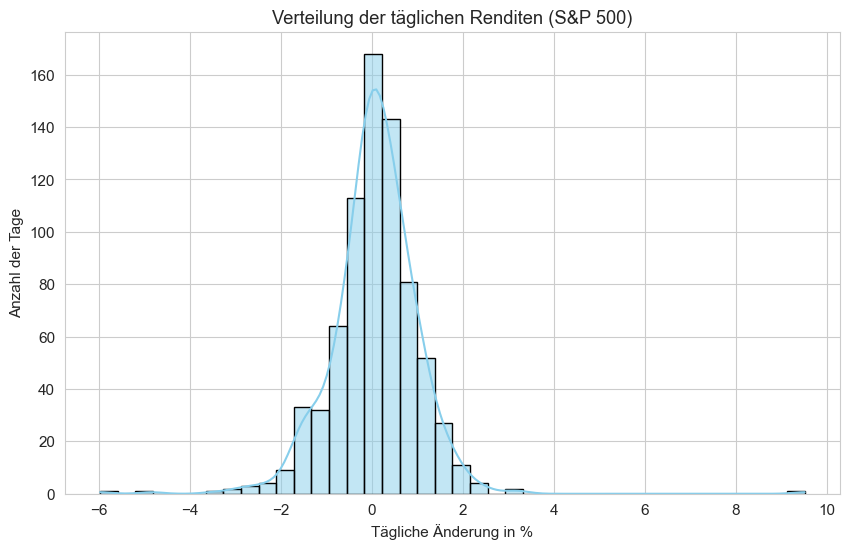

In [22]:
# Beispiel: Histogramm für eine numerische Variable
# Histogramm für die tägliche prozentuale Änderung
plt.figure(figsize=(10, 6))

# Wir nutzen Seaborn (sns), das sieht moderner aus als Standard-Matplotlib
sns.histplot(df['Change_Percent'], bins=40, kde=True, color='skyblue', edgecolor='black')

plt.title('Verteilung der täglichen Renditen (S&P 500)')
plt.xlabel('Tägliche Änderung in %')
plt.ylabel('Anzahl der Tage')
plt.show()

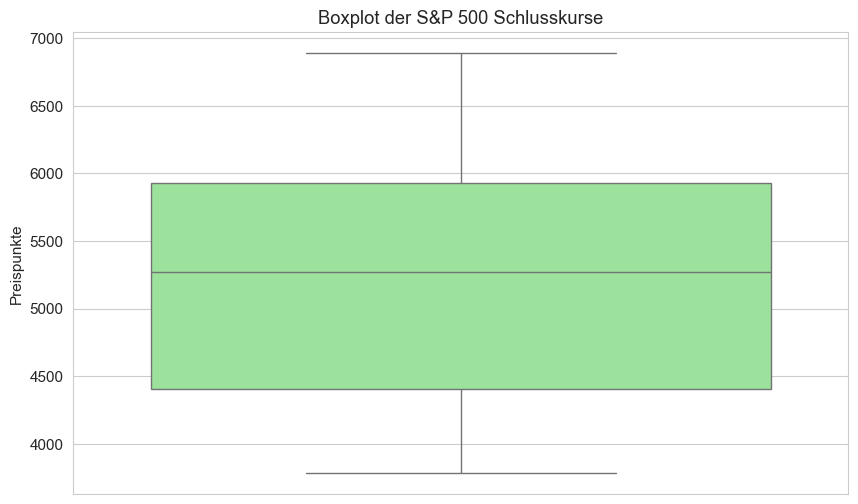

In [23]:
# Beispiel: Boxplot für eine numerische Variable
# Boxplot für die Schlusskurse
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Close'], color='lightgreen')

plt.title('Boxplot der S&P 500 Schlusskurse')
plt.ylabel('Preispunkte')
plt.show()
# sns.boxplot(y=df['spaltenname'])
# plt.title('Boxplot von [Spaltenname]')
# plt.show()


In [24]:
# Kategoriale Spalten identifizieren
# Da wir keine kategorialen Spalten haben, erstellen wir eine für die Übung:
# Wenn Change_Percent > 0, nennen wir es "Positiv", sonst "Negativ"
df['Day_Trend'] = np.where(df['Change_Percent'] > 0, 'Positiv (Grün)', 'Negativ (Rot)')

# Jetzt identifizieren wir die kategorialen Spalten erneut
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Kategoriale Spalten: {list(categorical_cols)}")
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# print(f"Kategoriale Spalten: {list(categorical_cols)}")


Kategoriale Spalten: ['Day_Trend']


/var/folders/fv/zzhfqf_5775b_nh2z0cb_7cm0000gn/T/ipykernel_22326/3954885778.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




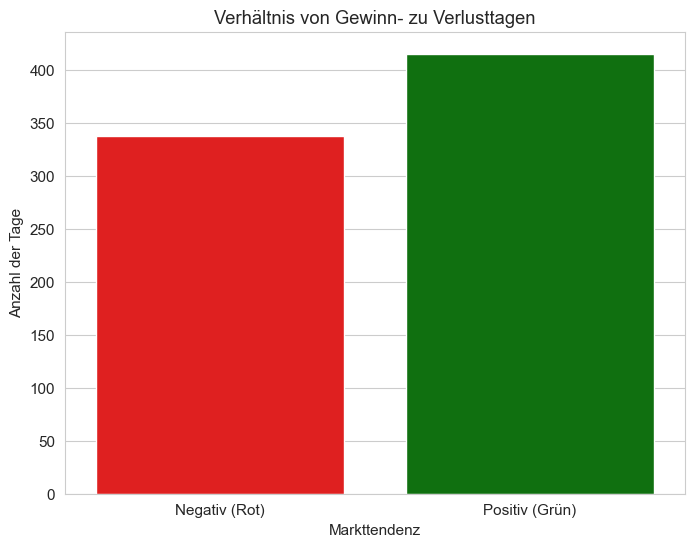

In [25]:
# Beispiel: Count Plot für eine kategoriale Variable
# Count Plot für unseren neuen 'Day_Trend'
plt.figure(figsize=(8, 6))

# Palette definiert die Farben (Grün für Positiv, Rot für Negativ)
sns.countplot(data=df, x='Day_Trend', palette={'Positiv (Grün)': 'green', 'Negativ (Rot)': 'red'})

plt.title('Verhältnis von Gewinn- zu Verlusttagen')
plt.xlabel('Markttendenz')
plt.ylabel('Anzahl der Tage')
plt.show()
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df, x='spaltenname')
# plt.title('Häufigkeit von [Spaltenname]')
# plt.xlabel('[Spaltenname]')
# plt.ylabel('Anzahl')
# plt.xticks(rotation=45)
# plt.show()


---
## 4. Bivariate Analysen - Beziehungen zwischen zwei Variablen

**Aufgabe:** Untersuchen Sie Beziehungen zwischen zwei Variablen.

**Mögliche Visualisierungen:**
- Scatter Plots (numerisch vs. numerisch)
- Line Plots (bei Zeitreihen)
- Grouped Bar Charts (kategorial vs. numerisch)
- Box Plots nach Kategorien (kategorial vs. numerisch)
- Violin Plots nach Kategorien

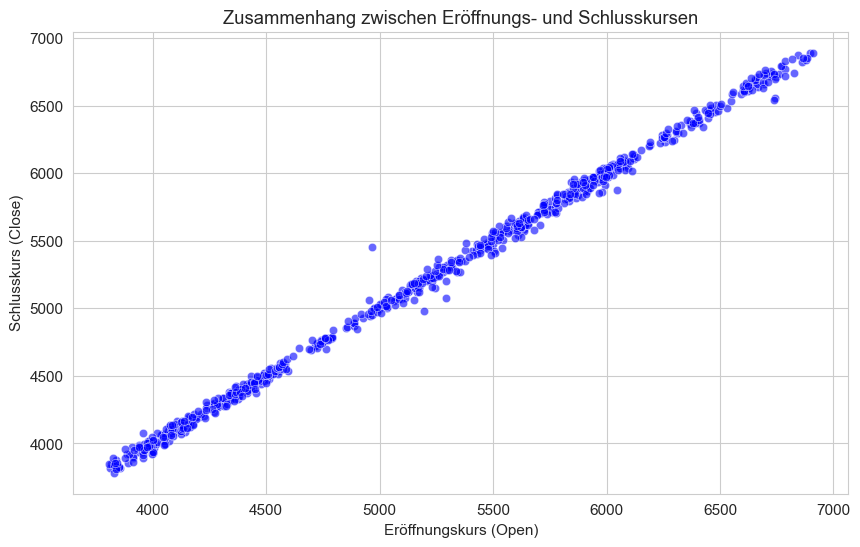

In [26]:
# Beispiel: Scatter Plot (numerisch vs. numerisch)
# Scatter Plot: Open vs. Close
plt.figure(figsize=(10, 6))

# alpha=0.5 macht die Punkte leicht transparent, damit man Cluster besser sieht
sns.scatterplot(data=df, x='Open', y='Close', alpha=0.6, color='blue')

plt.title('Zusammenhang zwischen Eröffnungs- und Schlusskursen')
plt.xlabel('Eröffnungskurs (Open)')
plt.ylabel('Schlusskurs (Close)')
plt.grid(True)
plt.show()
# plt.figure(figsize=(10, 6))
# plt.scatter(df['spalte1'], df['spalte2'], alpha=0.5)
# plt.title('Beziehung zwischen [Spalte1] und [Spalte2]')
# plt.xlabel('[Spalte1]')
# plt.ylabel('[Spalte2]')
# plt.show()


/var/folders/fv/zzhfqf_5775b_nh2z0cb_7cm0000gn/T/ipykernel_22326/2649346604.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




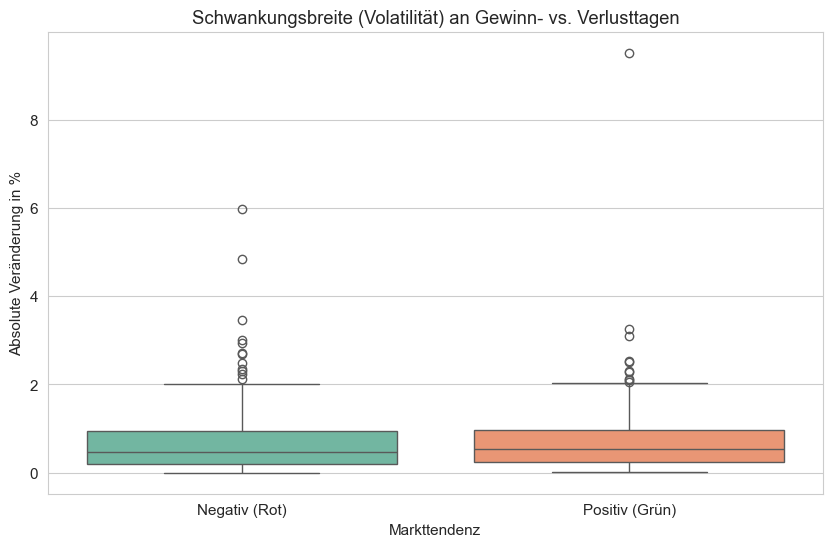

In [27]:
# Beispiel: Boxplot nach Kategorien
# Boxplot: Wie stark ist die Änderung (Change_Percent) an positiven vs. negativen Tagen?
plt.figure(figsize=(10, 6))

# Wir erstellen eine temporäre Spalte für den Absolutbetrag der Änderung (Volatilität)
df['Abs_Change'] = df['Change_Percent'].abs()

sns.boxplot(data=df, x='Day_Trend', y='Abs_Change', palette='Set2')

plt.title('Schwankungsbreite (Volatilität) an Gewinn- vs. Verlusttagen')
plt.xlabel('Markttendenz')
plt.ylabel('Absolute Veränderung in %')
plt.show()
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df, x='kategoriale_spalte', y='numerische_spalte')
# plt.title('[Numerische Spalte] nach [Kategoriale Spalte]')
# plt.xticks(rotation=45)
# plt.show()


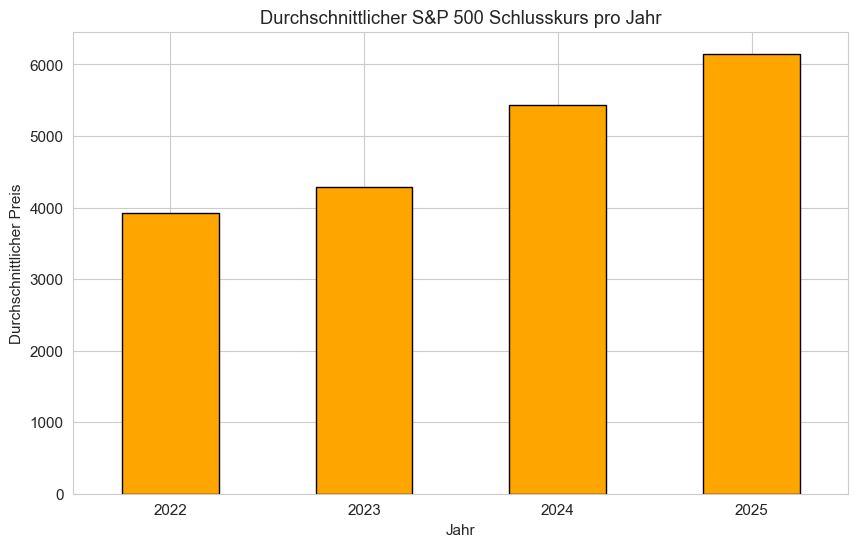

In [28]:
# Beispiel: Grouped Bar Chart
# Grouped Bar Chart: Durchschnittlicher Schlusskurs pro Jahr
# Jahr aus dem Index extrahieren
df['Year'] = df.index.year

# Durchschnitt berechnen
yearly_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Durchschnittlicher S&P 500 Schlusskurs pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Preis')
plt.xticks(rotation=0)
plt.show()
# grouped_data = df.groupby('kategoriale_spalte')['numerische_spalte'].mean()
# plt.figure(figsize=(10, 6))
# grouped_data.plot(kind='bar')
# plt.title('Durchschnittliche [Numerische Spalte] nach [Kategoriale Spalte]')
# plt.xlabel('[Kategoriale Spalte]')
# plt.ylabel('Durchschnitt [Numerische Spalte]')
# plt.xticks(rotation=45)
# plt.show()


---
## 5. Korrelationsanalyse

**Aufgabe:** Untersuchen Sie Korrelationen zwischen numerischen Variablen.

**Visualisierungen:**
- Korrelationsmatrix als Heatmap
- Pairplot für ausgewählte Variablen

**Hinweis:** Korrelationen zeigen nur lineare Beziehungen!

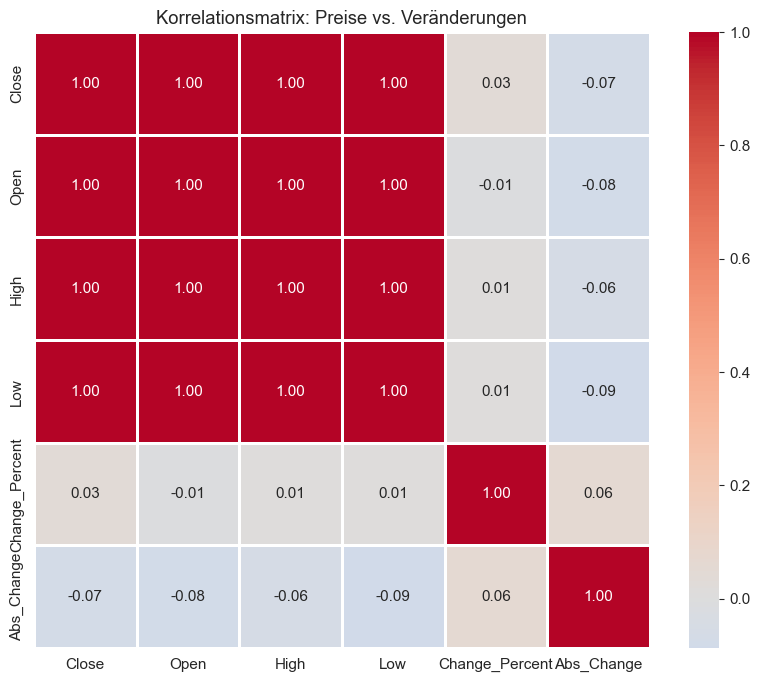

In [29]:
# Korrelationsmatrix berechnen
# correlation_matrix = df[numeric_cols].corr()
# 1. Korrelationsmatrix berechnen
# Wir stellen sicher, dass wir nur numerische Spalten nehmen
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# 2. Heatmap der Korrelationen
plt.figure(figsize=(10, 8))

# annot=True zeigt die Zahlen in den Kästchen
# cmap='coolwarm' macht positive Korrelation rot, negative blau
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')

plt.title('Korrelationsmatrix: Preise vs. Veränderungen')
plt.show()
# Heatmap der Korrelationen
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
#             square=True, linewidths=1, fmt='.2f')
# plt.title('Korrelationsmatrix')
# plt.show()


In [30]:
# Optional: Pairplot für ausgewählte Variablen
# selected_cols = ['spalte1', 'spalte2', 'spalte3', 'spalte4']
# sns.pairplot(df[selected_cols])
# plt.suptitle('Pairplot ausgewählter Variablen', y=1.02)
# plt.show()


---
## 6. Multivariate Analysen

**Aufgabe:** Visualisieren Sie Beziehungen zwischen mehreren Variablen gleichzeitig.

**Mögliche Visualisierungen:**
- Scatter Plots mit Farb- oder Größenkodierung
- Facet Grids (mehrere Subplots)
- Stacked Bar Charts
- Bubble Charts

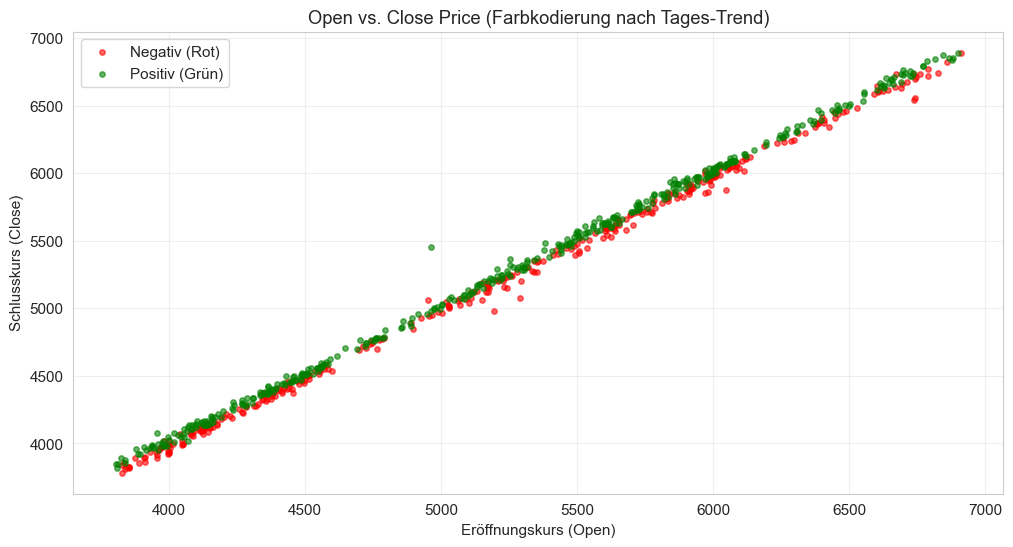

In [31]:
# Beispiel: Scatter Plot mit Farbkodierung
# Scatter Plot mit Farbkodierung: Open vs. Close, gruppiert nach Tagestrend
plt.figure(figsize=(12, 6))

# Wir definieren explizit Farben: Grün für Positiv, Rot für Negativ
colors = {'Positiv (Grün)': 'green', 'Negativ (Rot)': 'red'}

for category in df['Day_Trend'].unique():
    subset = df[df['Day_Trend'] == category]
    plt.scatter(subset['Open'], subset['Close'], 
                label=category, 
                alpha=0.6, 
                c=colors[category], # Farbe zuweisen
                s=15) # Punktgröße

plt.title('Open vs. Close Price (Farbkodierung nach Tages-Trend)')
plt.xlabel('Eröffnungskurs (Open)')
plt.ylabel('Schlusskurs (Close)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# plt.figure(figsize=(12, 6))
# for category in df['kategoriale_spalte'].unique():
#     subset = df[df['kategoriale_spalte'] == category]
#     plt.scatter(subset['spalte1'], subset['spalte2'], label=category, alpha=0.6)
# plt.title('Beziehung mit Kategorisierung')
# plt.xlabel('[Spalte1]')
# plt.ylabel('[Spalte2]')
# plt.legend()
# plt.show()


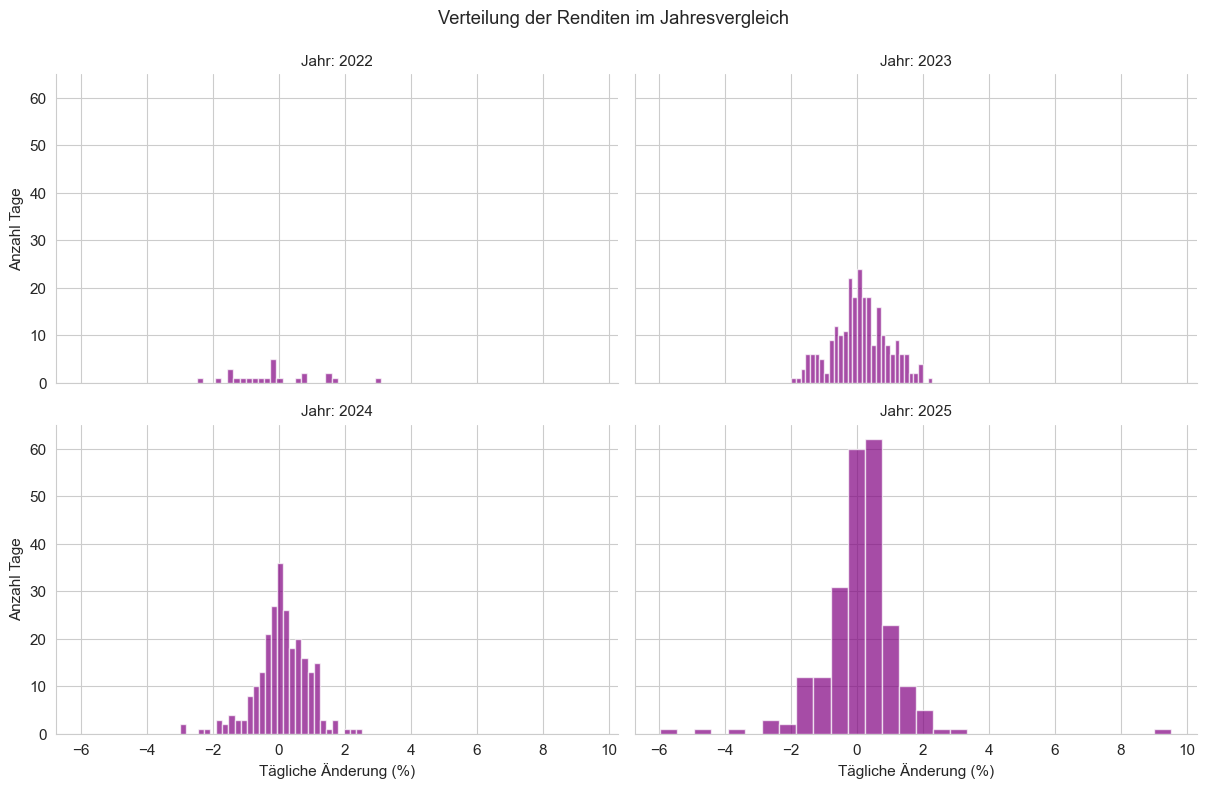

In [32]:
# Beispiel: Seaborn FacetGrid
# Sicherstellen, dass die Jahr-Spalte existiert
df['Year'] = df.index.year

# FacetGrid erstellen: Ein Plot pro Jahr (Spalte 'Year')
g = sns.FacetGrid(df, col='Year', col_wrap=2, height=4, aspect=1.5, sharex=True)

# In jedem Teil-Plot ein Histogramm der prozentualen Änderung zeichnen
g.map(plt.hist, 'Change_Percent', bins=30, color='purple', edgecolor='white', alpha=0.7)

# Beschriftungen anpassen
g.set_axis_labels('Tägliche Änderung (%)', 'Anzahl Tage')
g.set_titles(col_template='Jahr: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verteilung der Renditen im Jahresvergleich')
plt.show()
# g = sns.FacetGrid(df, col='kategoriale_spalte', height=4, aspect=1.5)
# g.map(plt.hist, 'numerische_spalte', bins=20)
# g.set_axis_labels('[Numerische Spalte]', 'Häufigkeit')
# g.set_titles(col_template='{col_name}')
# plt.show()


---
## 7. Interaktive Visualisierungen mit Plotly (Bonus!)

**Aufgabe:** Erstellen Sie interaktive Visualisierungen mit Plotly.

**Vorteile von interaktiven Plots:**
- Zoom- und Pan-Funktionen
- Hover-Informationen
- Dynamische Filter
- Bessere Exploration komplexer Daten

**Hinweis:** Diese Plots sind besonders nützlich für Ihre Streamlit-App!

In [33]:
# Beispiel: Interaktiver Scatter Plot
# --- Fehlende Spalten für die Visualisierung neu berechnen ---

# 1. Gleitender Durchschnitt (MA20) berechnen
df['MA20'] = df['Close'].rolling(window=20).mean()

# 2. Tagesrendite berechnen (wird für Hover-Daten benötigt)
df['Daily_Return'] = df['Close'].pct_change() * 100

# 3. Target Variable rekonstruieren (damit die Färbung funktioniert)
# Wir schauen 5 Tage in die Zukunft
df['Future_Close'] = df['Close'].shift(-5)
df['Future_Return'] = ((df['Future_Close'] - df['Close']) / df['Close']) * 100

# Target: 1 wenn Gewinn > 1%, sonst 0
df['Target'] = np.where(df['Future_Return'] > 1.0, 1, 0)

# Entfernen der NaN-Werte, die durch die Berechnung entstanden sind (wichtig für Plotly!)
df_plot = df.dropna().copy()

print("✅ Features (MA20, Target) erfolgreich berechnet.")
# Interaktiver Scatter Plot mit Plotly
fig = px.scatter(df_plot, 
                 x='MA20', 
                 y='Close',
                 color=df_plot['Target'].astype(str), # Jetzt existiert 'Target' wieder
                 hover_data=['Daily_Return'], 
                 title='Interaktiver Scatter: Kurs vs. Gleitender Durchschnitt',
                 labels={'color': 'Kaufsignal (1=Buy)', 'MA20': '20-Tage Durchschnitt'},
                 color_discrete_map={'0': 'red', '1': 'green'}) # Rot für Kein Kauf, Grün für Kauf

fig.show()
# fig = px.scatter(df, 
#                  x='spalte1', 
#                  y='spalte2',
#                  color='kategoriale_spalte',
#                  size='spalte3',  # optional: Größe nach dritter Variable
#                  hover_data=['spalte4', 'spalte5'],  # zusätzliche Infos beim Hovern
#                  title='Interaktiver Scatter Plot')
# fig.show()


✅ Features (MA20, Target) erfolgreich berechnet.


In [34]:
# Beispiel: Interaktives Histogramm
# Interaktives Histogramm der täglichen Änderungen
fig = px.histogram(df, 
                   x='Change_Percent',
                   color='Day_Trend', # Grün/Rot Trennung
                   marginal='box',    # Cooler Boxplot über dem Histogramm
                   nbins=50,
                   title='Verteilung der täglichen Renditen mit Boxplot',
                   color_discrete_map={'Positiv (Grün)': 'green', 'Negativ (Rot)': 'red'})
fig.show()
# fig = px.histogram(df, 
#                    x='numerische_spalte',
#                    color='kategoriale_spalte',
#                    marginal='box',  # Boxplot am Rand
#                    title='Interaktives Histogramm')
# fig.show()


In [35]:
# Beispiel: Interaktiver Box Plot
# Interaktiver Box Plot nach Jahren
fig = px.box(df, 
             x='Year', 
             y='Close',
             color='Year',
             points='outliers', # Zeigt nur Ausreißer als Punkte an
             title='Preisverteilung des S&P 500 nach Jahren')
fig.update_layout(xaxis_type='category') # Damit Jahre als Kategorie und nicht als Zahl behandelt werden
fig.show()
# fig = px.box(df, 
#              x='kategoriale_spalte', 
#              y='numerische_spalte',
#              color='kategoriale_spalte',
#              title='Interaktiver Box Plot')
# fig.show()


In [36]:
# Optional: Interaktive Korrelationsmatrix
# Interaktive Korrelationsmatrix
# Berechnung der Korrelation (nur numerische Spalten)
corr = df.select_dtypes(include='number').corr()

fig = px.imshow(corr,
                text_auto='.2f', # Zeigt Werte mit 2 Nachkommastellen
                aspect="auto",
                color_continuous_scale='RdBu_r', # Rot-Blau Skala
                title='Interaktive Korrelationsmatrix')
fig.show()
# fig = px.imshow(correlation_matrix,
#                 text_auto=True,
#                 color_continuous_scale='RdBu_r',
#                 title='Interaktive Korrelationsmatrix')
# fig.show()


In [37]:
# Interaktiver Candlestick Chart (Der "echte" Börsen-Chart)
# Zeigt nur die letzten 100 Tage, damit es nicht zu voll wird
subset = df.tail(100)

fig = go.Figure(data=[go.Candlestick(x=subset.index,
                open=subset['Open'],
                high=subset['High'],
                low=subset['Low'],
                close=subset['Close'])])

fig.update_layout(title='S&P 500 Candlestick Chart (Letzte 100 Tage)',
                  xaxis_title='Datum',
                  yaxis_title='Preis')
fig.show()

---
## 8. Visualisierungen für Ihre Forschungsfrage

**Aufgabe:** Nachdem Sie in den Aufgaben 1-7 "experimentiert" haben, erstellen Sie jetzt spezifische Visualisierungen, die Ihre Forschungsfrage beantworten.

**Überlegen Sie:**
- Welche Variablen sind für Ihre Forschungsfrage am wichtigsten?
- Welche Visualisierungen zeigen die relevanten Muster am besten?
- Welche Insights können Sie aus den Daten gewinnen?

**Erstellen Sie mindestens 3 aussagekräftige Visualisierungen!**

In [ ]:
# Visualisierung 1

# in DataVisualization.ipynb bearbeitet 

NameError: name 'df_ml' is not defined

<Figure size 1400x700 with 0 Axes>

**Interpretation Visualisierung 1:**
- ...

In [ ]:
# Visualisierung 2

**Interpretation Visualisierung 2:**
- ...

In [ ]:
# Visualisierung 3

**Interpretation Visualisierung 3:**
- ...

In [ ]:
# Weitere Visualisierungen nach Bedarf



---
## 9. Visualisierungen speichern

**Aufgabe:** Speichern Sie Ihre wichtigsten Visualisierungen als Bilddateien.

**Hinweise:**
- Speichern Sie Plots in hoher Qualität (dpi=300)
- Verwenden Sie aussagekräftige Dateinamen
- Diese Bilder können Sie in Präsentationen oder Berichten verwenden
- Für Streamlit: Visualisierungen werden direkt im Code erstellt, nicht als Bilder eingebunden

In [ ]:
# Beispiel: Matplotlib/Seaborn Plot speichern
# plt.figure(figsize=(10, 6))
# # ... Ihr Plot-Code ...
# plt.savefig('plot_name.png', dpi=300, bbox_inches='tight')
# plt.show()


In [ ]:
# Beispiel: Plotly Plot als HTML speichern (für interaktive Nutzung)
# fig = px.scatter(...)  # Ihr Plotly Plot
# fig.write_html('interactive_plot.html')


---
## 10. Qualitätskontrolle durch Visualisierung

**Aufgabe:** Nutzen Sie Visualisierungen zur Qualitätskontrolle Ihrer Daten.

**Prüfen Sie:**
- Sind alle Ausreißer sinnvoll?
- Gibt es unerwartete Muster?
- Sind kategoriale Variablen konsistent kodiert?
- Gibt es offensichtliche Datenfehler?

**Falls Sie Probleme entdecken:** Gehen Sie zurück zu Ihrem Data Cleaning Notebook und korrigieren Sie diese!

In [ ]:
# Qualitätskontrolle: Überprüfen Sie Ihre Daten visuell



**Beobachtungen aus der Qualitätskontrolle:**
- ...

---
## Reflexion

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen:

1. Welche Visualisierungen waren am aufschlussreichsten für Ihre Forschungsfrage?
2. Welche unerwarteten Muster oder Erkenntnisse haben Sie entdeckt?
3. Welche Visualisierungstypen eignen sich am besten für Ihren Datensatz?
4. Welche Visualisierungen planen Sie für Ihre Streamlit-App zu verwenden?
5. Gab es Herausforderungen bei der Visualisierung? Wie haben Sie diese gelöst?
6. Haben die Visualisierungen neue Fragen aufgeworfen oder Ideen für weitere Analysen gegeben?

### Ihre Reflexion:

1. **Aufschlussreichste Visualisierungen:**
   - ...

2. **Unerwartete Erkenntnisse:**
   - ...

3. **Geeignetste Visualisierungstypen:**
   - ...

4. **Geplante Visualisierungen für Streamlit:**
   - ...

5. **Herausforderungen und Lösungen:**
   - ...

6. **Neue Fragen und Ideen:**
   - ...

---
## Zusammenfassung und nächste Schritte

**Sie haben in dieser Übung:**
- ✅ Verschiedene Visualisierungstypen auf Ihre Daten angewendet
- ✅ Univariate, bivariate und multivariate Analysen durchgeführt
- ✅ Interaktive Visualisierungen mit Plotly erstellt
- ✅ Spezifische Visualisierungen für Ihre Forschungsfrage entwickelt
- ✅ Ihre Datenqualität visuell überprüft

**Nächste Woche (Woche 9):**
- Machine Learning Grundlagen
- Erste ML-Modelle auf Ihren Daten trainieren
- Modell-Evaluation

**Tipp:** Speichern Sie dieses Notebook gut ab - die Visualisierungen bilden die Grundlage für Ihre Streamlit-App in Woche 10 und 11!